In [24]:
import yfinance as yf
import pandas as pd

In [48]:
tsla = yf.Ticker('TSLA')

In [49]:
tsla_data = tesla.history(period="1y")

In [50]:
tsla_data.reset_index(inplace=True)

In [51]:
tsla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-11-29 00:00:00-05:00,184.990005,186.380005,178.750000,180.830002,83357100,0.0,0.0
1,2022-11-30 00:00:00-05:00,182.429993,194.759995,180.630005,194.699997,109186400,0.0,0.0
2,2022-12-01 00:00:00-05:00,197.080002,198.919998,191.800003,194.699997,80046200,0.0,0.0
3,2022-12-02 00:00:00-05:00,191.779999,196.250000,191.110001,194.860001,73645900,0.0,0.0
4,2022-12-05 00:00:00-05:00,189.440002,191.270004,180.550003,182.449997,93122700,0.0,0.0


In [52]:
import requests
from bs4 import BeautifulSoup 

In [53]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="1y")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-11-29 00:00:00-05:00,25.580000,26.350000,25.320000,25.600000,2029500,0.0,0.0
1,2022-11-30 00:00:00-05:00,25.900000,26.230000,24.910000,26.209999,3731100,0.0,0.0
2,2022-12-01 00:00:00-05:00,26.000000,27.500000,25.180000,26.600000,7615200,0.0,0.0
3,2022-12-02 00:00:00-05:00,26.250000,27.870001,26.110001,27.520000,4577200,0.0,0.0
4,2022-12-05 00:00:00-05:00,27.309999,27.480000,25.440001,25.559999,4973700,0.0,0.0


In [54]:
import matplotlib.pyplot as plt

In [55]:
def make_graph(data):
    data['Close'].plot()
    plt.show()

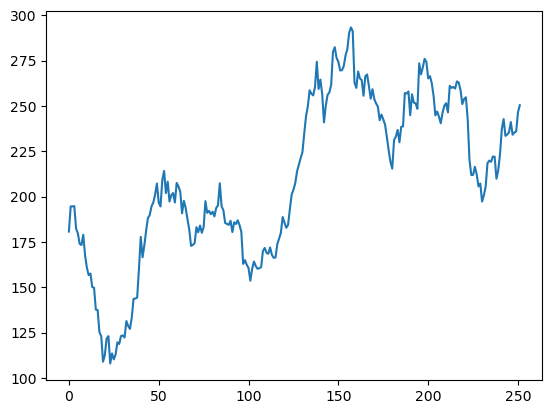

In [56]:
make_graph(tsla_data)

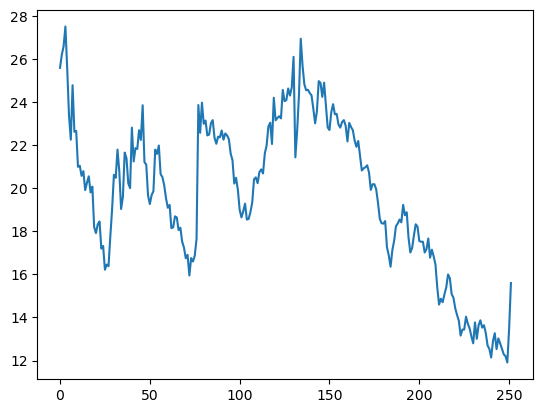

In [57]:
make_graph(gme_data)